In [46]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn import metrics
from numpy.linalg import svd

%matplotlib inline
sns.set()

pd.options.display.max_rows = 200
pd.options.display.max_columns = 200
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams["figure.figsize"] = (12,6)

In [228]:
# Load data
hero_agg = pd.read_csv('aggregated_superheroes.csv',sep=';')
print("NaN:", hero_agg.isna().values.any()) # check na
print("Duplicates:", hero_agg.name.duplicated().any()) # check duplicates in names
hero_agg = hero_agg.set_index('name')
hero_agg.head()

NaN: False
Duplicates: False


,intelligence,strength,speed,durability,power,combat,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,Dexterity & speed,Healing,Weapon abilities,Brainpower,Energy powers,Sences & Thermal abilities,Psychic abilities,Body features,Space abilities,Defensive abilities,Similiar to magic,God-like abilities
name,,,,,,,,,,,,,,,,,,,,,,,,,,
A-Bomb,38,100,17,80,24,64,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0,1,2,0,0,0,0,0,3,0,1,0,0
Abe Sapien,88,28,35,65,100,85,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0,3,2,2,1,0,2,1,5,0,0,0,0
Abin Sur,50,90,53,64,99,65,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0,0,0,0,0,1,0,0,0,0,0,0,0
Abomination,63,80,53,90,62,95,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0,2,2,0,1,0,0,0,2,0,0,1,0
Absorbing Man,38,80,25,100,98,64,Male,blue,Human,No Hair,193.0,Marvel Comics,bad,122.0,0,1,0,0,1,2,0,2,0,3,2,0


In [229]:
subset_features = ['intelligence','strength','speed','durability','power','combat']
hero_agg[subset_features]

,intelligence,strength,speed,durability,power,combat
name,,,,,,
A-Bomb,38,100,17,80,24,64
Abe Sapien,88,28,35,65,100,85
Abin Sur,50,90,53,64,99,65
Abomination,63,80,53,90,62,95
Absorbing Man,38,80,25,100,98,64
...,...,...,...,...,...,...
Yellowjacket,88,10,12,28,12,14
Yellowjacket II,50,10,35,28,31,28
Yoda,88,52,33,25,100,90


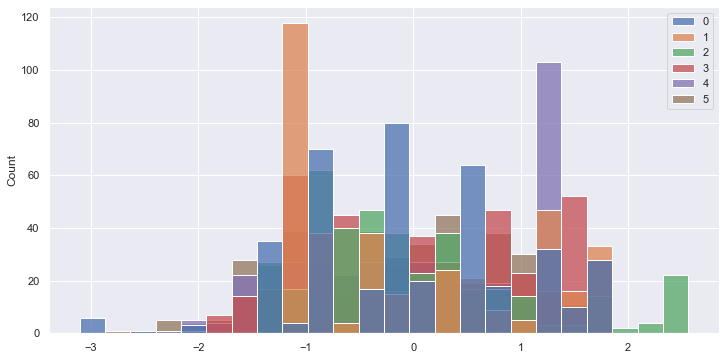

In [168]:
# Standartization
scaler = StandardScaler()
standard_scaled_data = scaler.fit_transform(hero_agg[subset_features])
sns.histplot(standard_scaled_data)

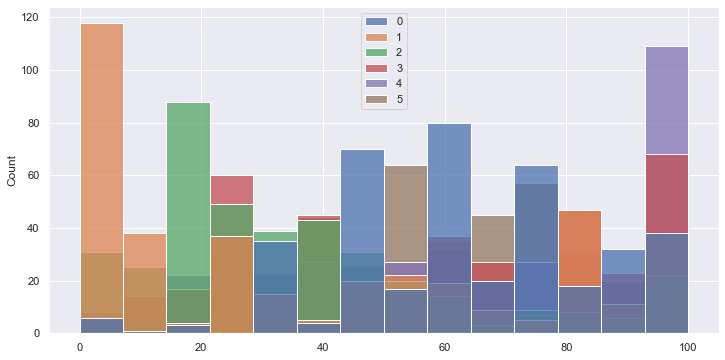

In [169]:
# Ranking normalization
scaler = MinMaxScaler((0,100))
rank_scaled_data = scaler.fit_transform(hero_agg[subset_features])
sns.histplot(rank_scaled_data)

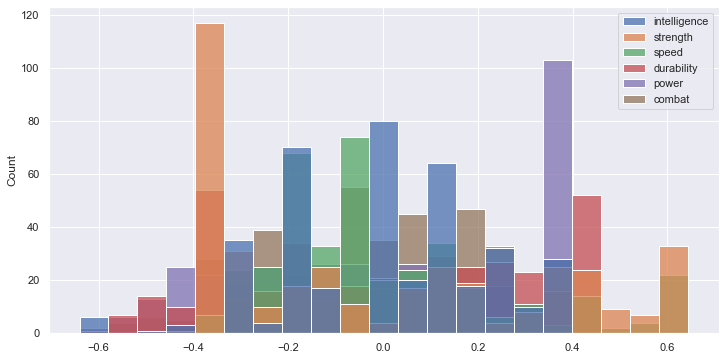

In [170]:
# RangeNoramlization - each feature centered by its mean and normalized by its range
def MeanRangeScale(df):
    return (df-df.mean())/(df.max()-df.min())

range_scaled_data = MeanRangeScale(hero_agg[subset_features])
sns.histplot(range_scaled_data)

In [191]:
# Calculate data scatter and SVD
def calculate_principal_components(data):
    data_scatter = (data**2).sum()
    z, mu, c = svd(data)
    contributions = mu**2
    percent_contributions = np.array(100*contributions/data_scatter)
    print('Naturally contributions:', np.round(contributions,3))
    print('Percent contributions:', np.round(percent_contributions,3))
    return z, mu, c
z, mu, c = calculate_principal_components(standard_scaled_data)

Naturally contributions: [953.832 463.371 323.549 240.972 213.881 132.396]
Percent contributions: [40.972 19.904 13.898 10.351  9.187  5.687]


In [193]:
z, mu, c = calculate_principal_components(hero_agg[subset_features])

Naturally contributions: [8267960.318  386678.178  226531.922  135904.244  121679.707  102899.631]
Percent contributions: [460.186  34.487  26.564   7.919   6.128   5.816]


In [173]:
# Calculate hidden factor
z, mu, c = calculate_principal_components(rank_scaled_data)
z = -z
c = -c[0]
mu = mu[0]
alpha = 100/c.dot(np.repeat(100,rank_scaled_data.shape[1]))
print('alpha:', round(alpha,3))
print('c:', np.round(c,3))
hidden_factor = np.sum((c*alpha)*rank_scaled_data,axis=1)

Naturally contributions: [7642122.752  434249.804  252095.487  158975.878  135493.826  115192.392]
Percent contributions: [87.457  4.97   2.885  1.819  1.551  1.318]
alpha: 0.415
c: [0.449 0.325 0.275 0.443 0.48  0.437]


In [230]:
# Top superheroes by hidden factor
hero_agg['hidden'] = hidden_factor
subset_features.extend(['hidden','Alignment'])
hero_agg.sort_values(by='hidden',ascending=False).loc[:,subset_features].head()

,intelligence,strength,speed,durability,power,combat,hidden,Alignment
name,,,,,,,,
Steppenwolf,94,100,83,100,100,100,96.510944,bad
Superboy-Prime,94,100,100,100,100,85,95.755345,bad
Superman,94,100,100,100,100,85,95.755345,good
Martian Manhunter,100,95,92,100,100,85,95.243630,good
Big Barda,88,100,79,100,100,100,94.824899,bad


Naturally contributions: [84.719 25.93  22.284 15.72  13.182 11.299]
Percent contributions: [528.211  57.196  90.677  46.447  39.181  57.367]
Proportion of the variance taken into account: 63.909451405663496


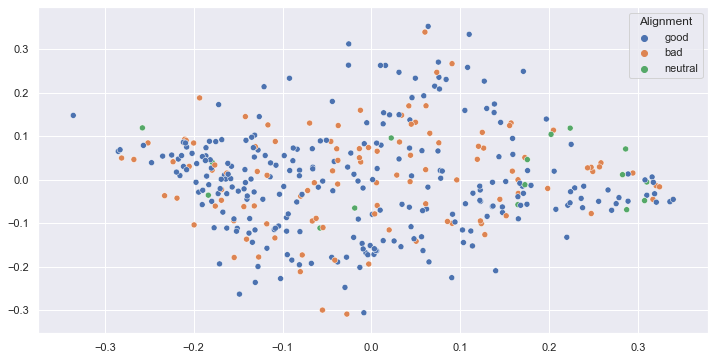

In [235]:
# Visualize range scaled
def vizualize(data):
    z, mu, c = calculate_principal_components(data)
    z1 = z[:,0]*np.sqrt(mu[0])
    z2 = z[:,1]*np.sqrt(mu[1])
    p = 100*(mu[0]**2+mu[1]**2)/(data**2).sum().sum()
    print("Proportion of the variance taken into account:", p)
    sns.scatterplot(z1, z2, hue=hero_agg.Alignment)
    
vizualize(range_scaled_data)

Naturally contributions: [953.832 463.371 323.549 240.972 213.881 132.396]
Percent contributions: [40.972 19.904 13.898 10.351  9.187  5.687]
Proportion of the variance taken into account: 60.876420618343815


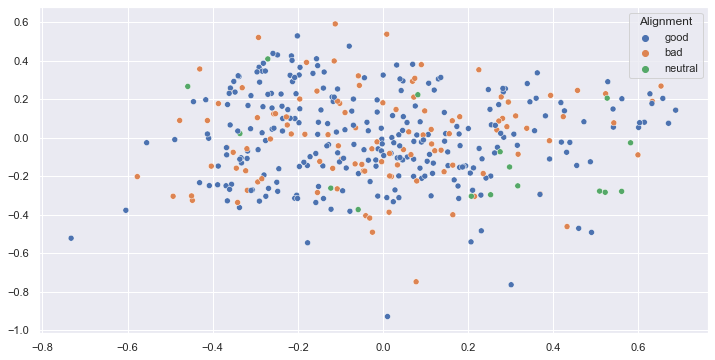

In [234]:
vizualize(standard_scaled_data)